### Add dataset to "/content"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class RetailSalesAnalyzer:
  def __init__(self) -> None:
    self.data = pd.read_csv("/content/retail_sales.csv")
    self.data['Date'] = pd.to_datetime(self.data["Date"])
    self.total_sales = np.nan

  def filer_data(self) -> None:
    self.data.dropna(inplace = True)

  def calculate_total_sales_per_product(self) -> pd.DataFrame:
    return self.data.groupby("Product")["Sales"].sum()

  def best_selling_product(self) -> str:
    return self.calculate_total_sales_per_product().sort_values(ascending=False).index[0]

  def average_daily_sales(self) -> float:
    return self.data["Sales"].mean()

  def plot_sales_trend(self) -> None:
    self.data.groupby("Date")["Sales"].sum().plot(kind="line")
    plt.title("Sale trend over time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()

  def plot_sales_per_product(self) -> None:
    self.calculate_total_sales_per_product().plot(kind="bar")
    plt.title("Sales per product")
    plt.xlabel("Product")
    plt.ylabel("Total Sales")
    plt.show()

Total sales per Product:
 Product
Product A    130
Product B    140
Product C    150
Name: Sales, dtype: int64

Best selling Product: Product C

Average daily sales: 52.5



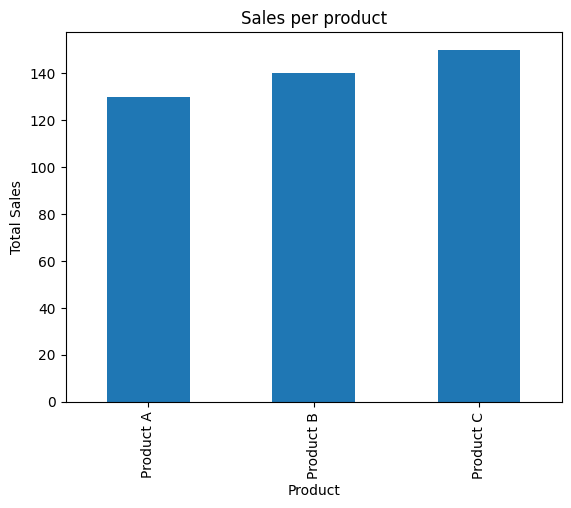

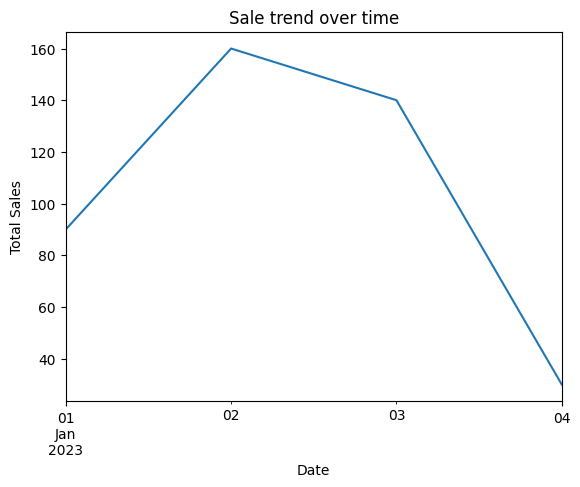

In [13]:
analyzer = RetailSalesAnalyzer()
print("Total sales per Product:\n", analyzer.calculate_total_sales_per_product())
print("\nBest selling Product:", analyzer.best_selling_product())
print("\nAverage daily sales:", analyzer.average_daily_sales())
print()
analyzer.plot_sales_per_product()
print()
analyzer.plot_sales_trend()